In [1]:
import cv2
import google.colab.patches as colab
import matplotlib.pyplot as plt
import numpy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
in_mat = cv2.imread("/content/drive/MyDrive/Colab Notebooks/histogram equalization/lena.bmp", 0)

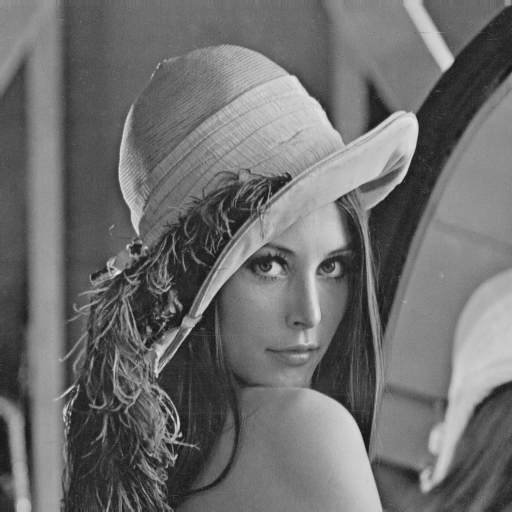

In [4]:
colab.cv2_imshow(in_mat)

get the rows and columns of the input image

In [5]:
rows = in_mat.shape[0]
cols = in_mat.shape[1]

**Step1**: compute the histogram of input image

In [6]:
in_hist = numpy.zeros((256), dtype=float)

for r in range(rows):
  for c in range(cols):

    gray_value = in_mat[r, c]
    in_hist[gray_value] = in_hist[gray_value] + 1

for i in range(256):
  in_hist[i] = in_hist[i] / (rows * cols)

display the histogram of the input image

<BarContainer object of 256 artists>

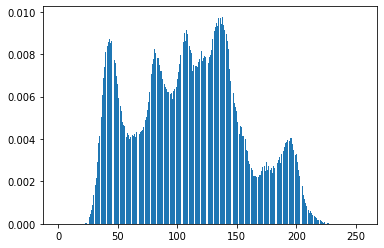

In [7]:
plt.bar(range(in_hist.shape[0]), in_hist)

**Step2:** compute the transformation function $T(.)$



In [8]:
# T: transformation function
T = numpy.zeros((256), dtype=int)

# acc_pr: the accumulated probability of the input histogram
acc_pr = 0.0;

for x in range(256):
  acc_pr = acc_pr + in_hist[x]
  T[x] = int(255.0 * acc_pr)

display the transformation function $T(.)$

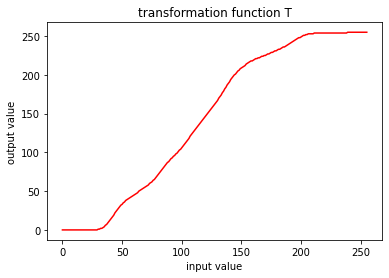

In [9]:
plt.title('transformation function T')
plt.xlabel('input value')
plt.ylabel('output value')
plt.plot(range(T.shape[0]), T, 'r')
plt.show()

**Step 3**: transform the value of each pixel


In [10]:
# create an output image
out_mat = numpy.zeros(in_mat.shape, dtype=numpy.uint8)

for r in range(rows):
  for c in range(cols):
    gray_value = in_mat[r, c]
    out_value = T[gray_value]
    out_mat[r, c] = out_value

display the image after histogram equalization

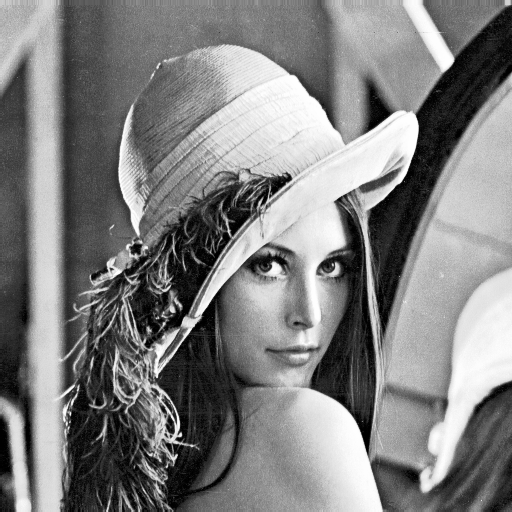

In [11]:
colab.cv2_imshow(out_mat)

display the histogram of the image after histogram equalization

In [12]:
out_hist = numpy.zeros((256), dtype=float)

for r in range(rows):
  for c in range(cols):
    gray_value = out_mat[r, c]
    out_hist[gray_value] = out_hist[gray_value] + 1

for i in range(256):
  out_hist[i] = out_hist[i] / (rows * cols)

<BarContainer object of 256 artists>

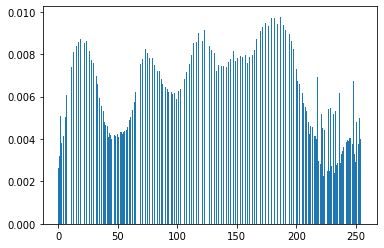

In [13]:
plt.bar(range(out_hist.shape[0]), out_hist)